In [1]:
#Loading and Inspecting the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
#Loading and Inspecting the Dataset

file_path = 'Insurance_Cost_Prediction .csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.sum().isnull()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
# Handle missing data
# Assuming that any missing data can be filled with the mean for numeric columns
# and the mode for categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

In [10]:
# Convert categorical data to numeric using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['sex', 'smoker', 'region']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [11]:
# Extracting relevant features
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [12]:
for column in data:
    print(column)

age
sex
bmi
children
smoker
region
charges


In [13]:
# Processed Data
print("\nProcessed Data:")
data.head()


Processed Data:


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
# Correlation matrix
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
print(corr_matrix)


Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


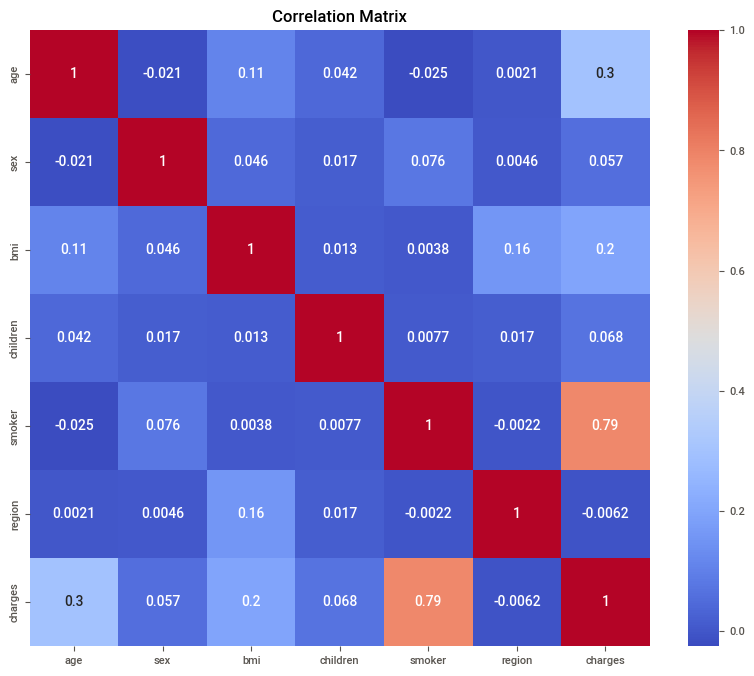

In [16]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Insights:-
# A correlation matrix heatmap helps you quickly see relationships between variables:
# Strong Positive Correlation: Closer to +1, meaning both variables increase together (e.g., charges vs. age or bmi).
# Strong Negative Correlation: Closer to -1, meaning as one increases, the other decreases (e.g., age vs. children, if applicable).
# Weak or No Correlation: Values close to 0 mean no clear relationship between variables.
# In your case, high correlations between charges and features like age, bmi, and smoker status would suggest those features are important for predicting insurance costs.

C:\Users\prame\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


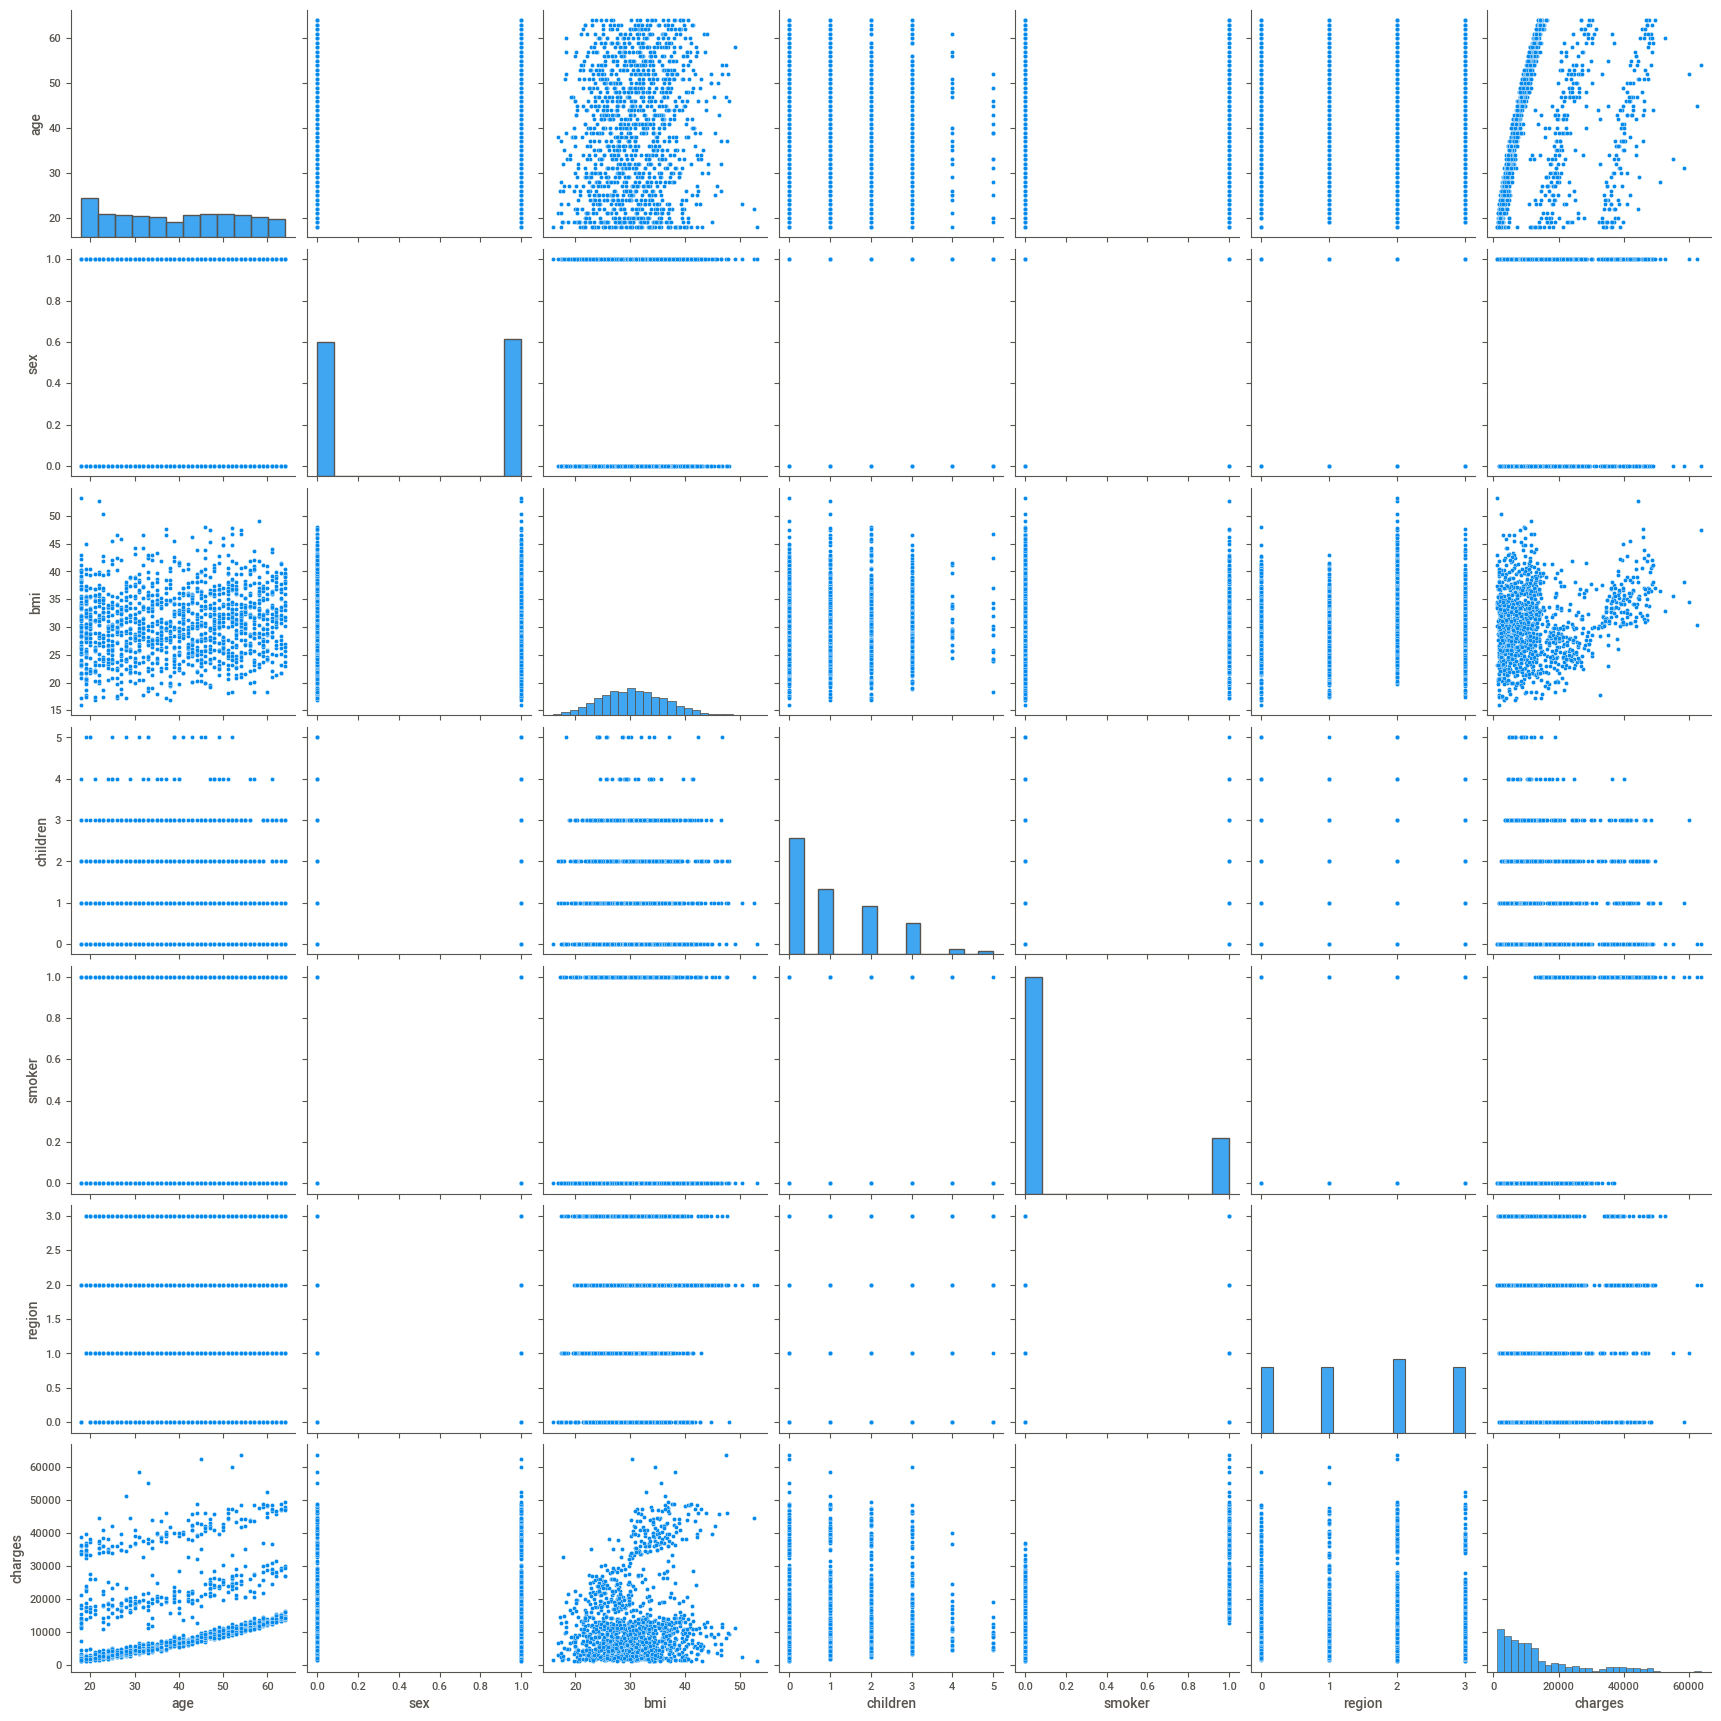

In [18]:
# Create a pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

In [19]:
# Insights:-
# Pairplot Analysis:
# In the insurance dataset, a pairplot might reveal the following:
# Age vs. Charges: Older individuals may have higher insurance charges.
# BMI vs. Charges: Higher BMI may correlate with higher charges, especially for smokers.
# Smoker vs. Charges: Smokers likely have much higher insurance charges compared to non-smokers.

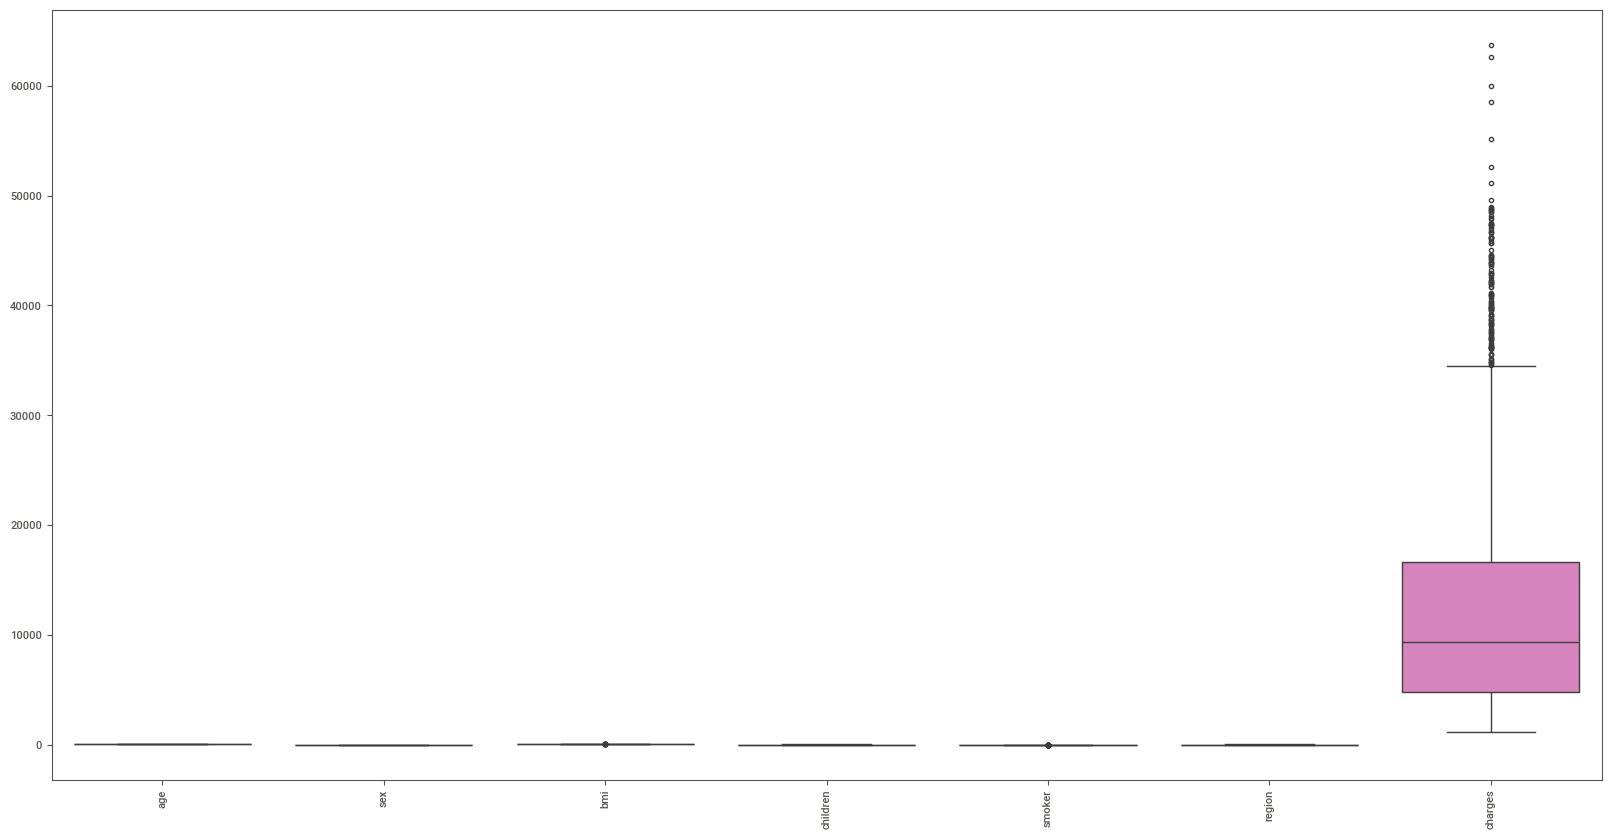

In [20]:
# Visualize feature importances
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Set up the visualizations
sns.set(style="whitegrid")

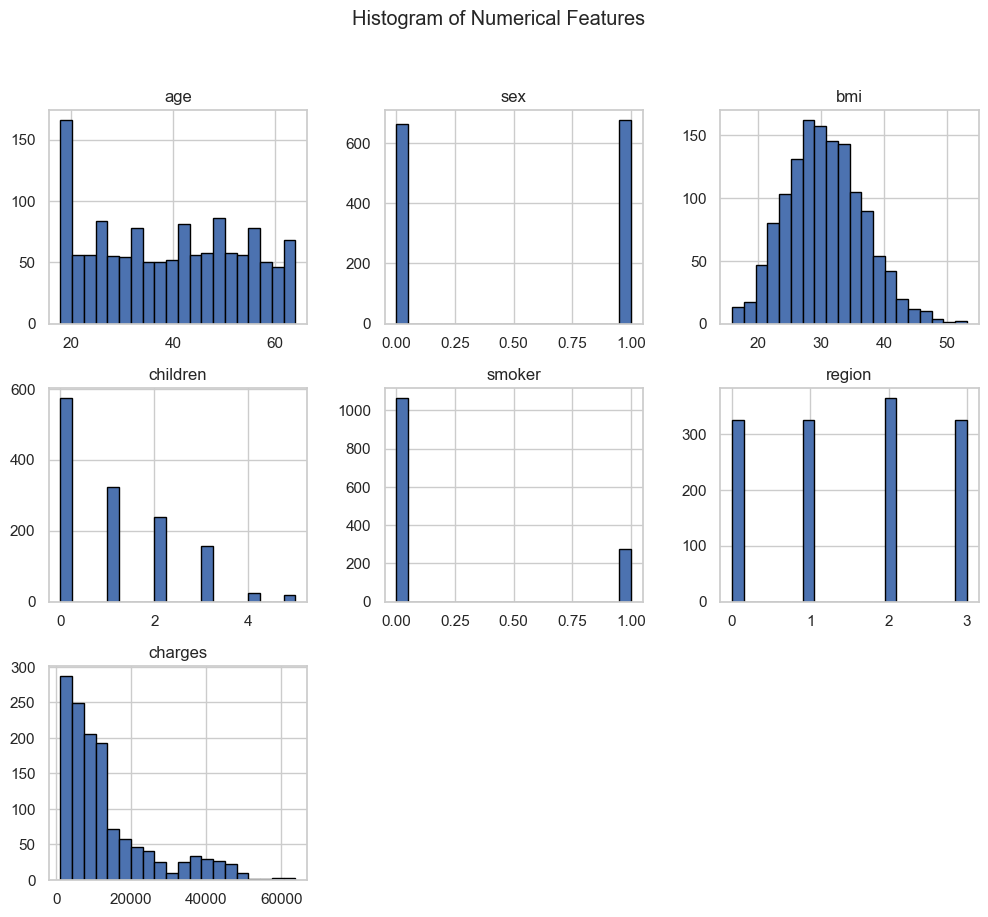

In [22]:
# Data Distribution for Numerical Features
data.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle('Histogram of Numerical Features')
plt.show()

In [23]:
# Insights from Histograms:
# Age:
# You can see how the ages of individuals are distributed. Is it skewed toward younger or older individuals?
# BMI:
# A histogram of BMI helps in identifying whether most individuals fall within a healthy BMI range, or if there are clusters of higher BMI values indicating potential health risks.
# Charges:
# The distribution of insurance charges helps in understanding whether the charges are normally distributed or skewed, which is important for prediction models.
# Children:
# This shows how many dependents most people have, and if there is a significant portion with a high number of children.

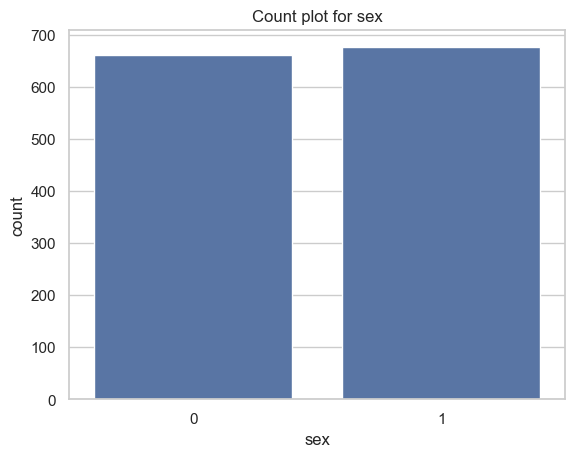

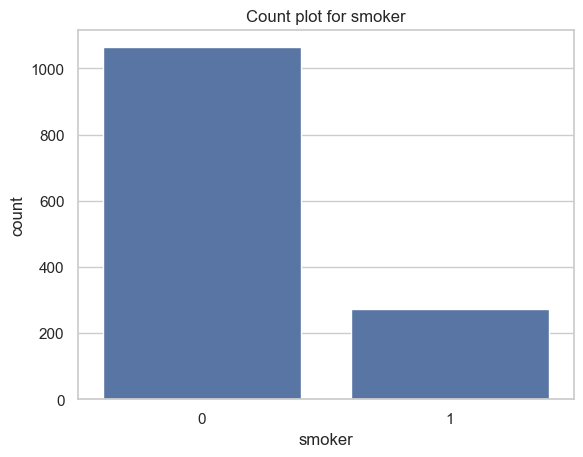

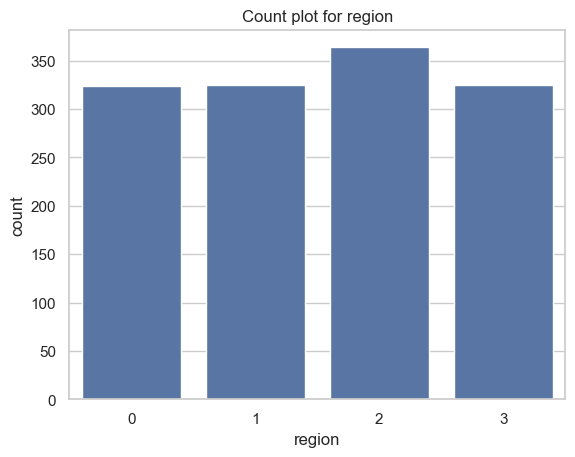

In [24]:
# Count plots for Categorical Features
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.title(f'Count plot for {feature}')
    plt.show()

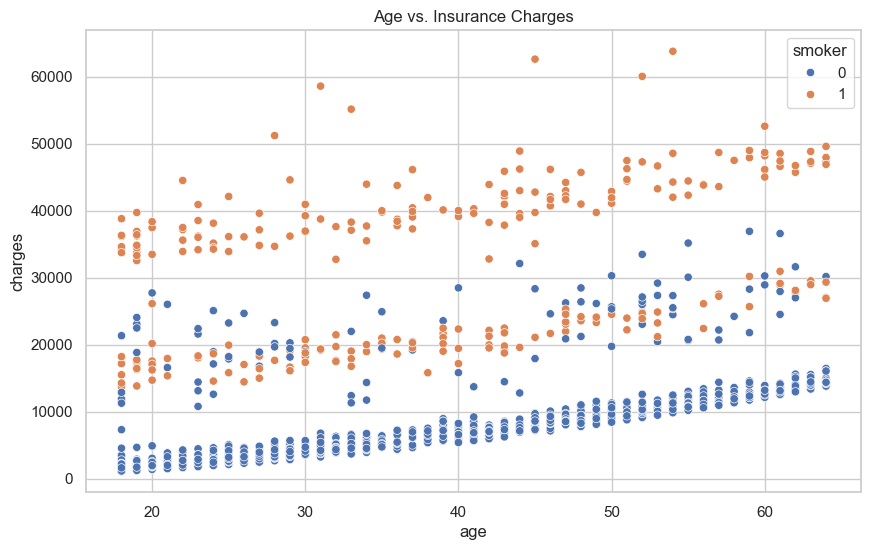

In [25]:
# Scatterplot for Age vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data, hue='smoker')
plt.title('Age vs. Insurance Charges')
plt.show()

In [26]:
# Age vs. Charges:
# Shows the relationship between a person's age and the insurance charges.
# The hue='smoker' parameter differentiates smokers from non-smokers, which helps identify how smoking affects the charges.

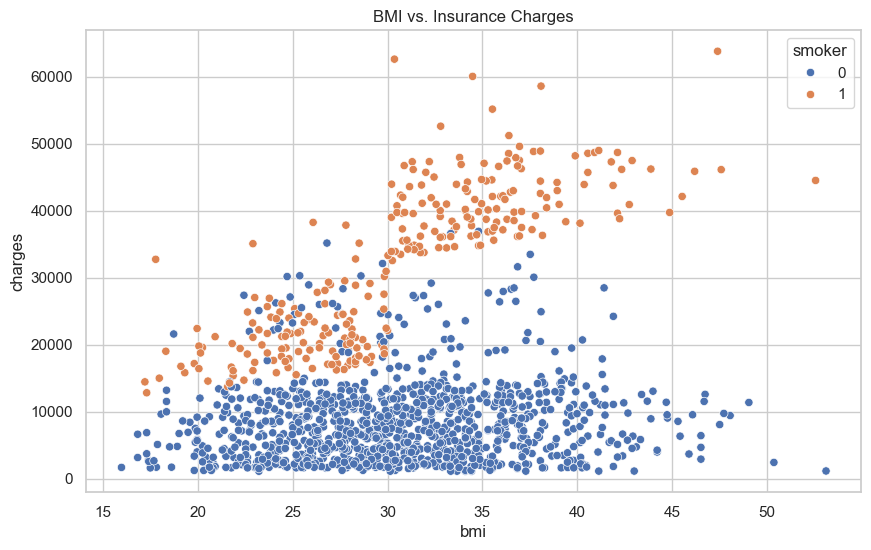

In [27]:
# Scatterplot for BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker')
plt.title('BMI vs. Insurance Charges')
plt.show()

In [28]:
# BMI vs. Charges:
# Displays how BMI impacts insurance charges.
# The scatterplot may reveal that people with a higher BMI tend to have higher charges, especially if they are smokers.

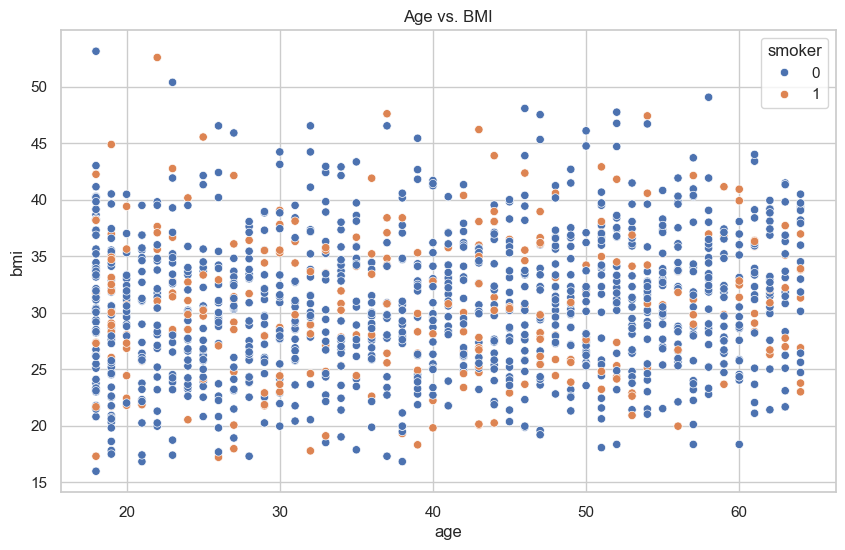

In [29]:
# Scatterplot for Age vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=data, hue='smoker')
plt.title('Age vs. BMI')
plt.show()

In [30]:
# Age vs. BMI:
# This scatterplot shows the relationship between age and BMI.
# It can help identify patterns, such as whether older individuals tend to have higher BMI values.

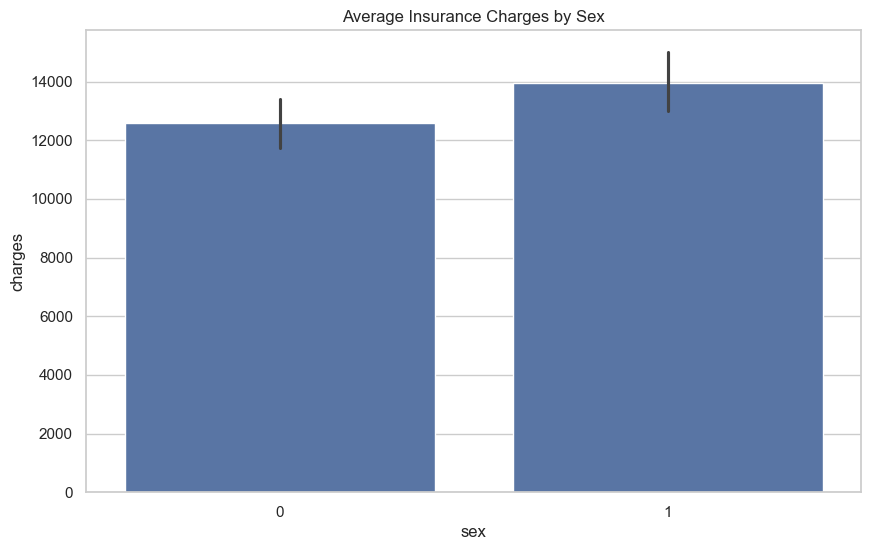

In [31]:
# Barplot for Average Charges by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='charges', data=data)
plt.title('Average Insurance Charges by Sex')
plt.show()

In [32]:
# Insights:- 
# Barplot for Average Charges by Sex: This shows the average insurance charges for males and females.

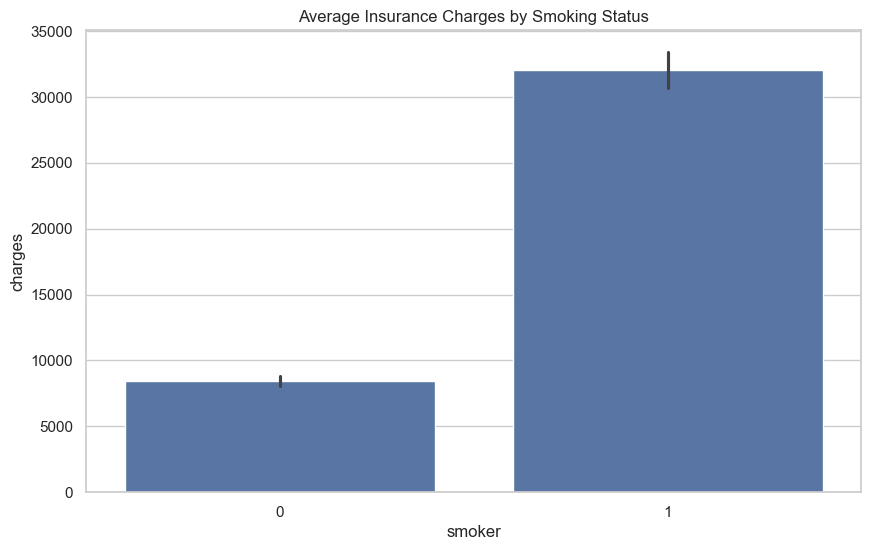

In [33]:
# Barplot for Average Charges by Smoker
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=data)
plt.title('Average Insurance Charges by Smoking Status')
plt.show()

In [34]:
# Insights:- 
# Barplot for Average Charges by Smoker: This highlights how being a smoker impacts the insurance charges.

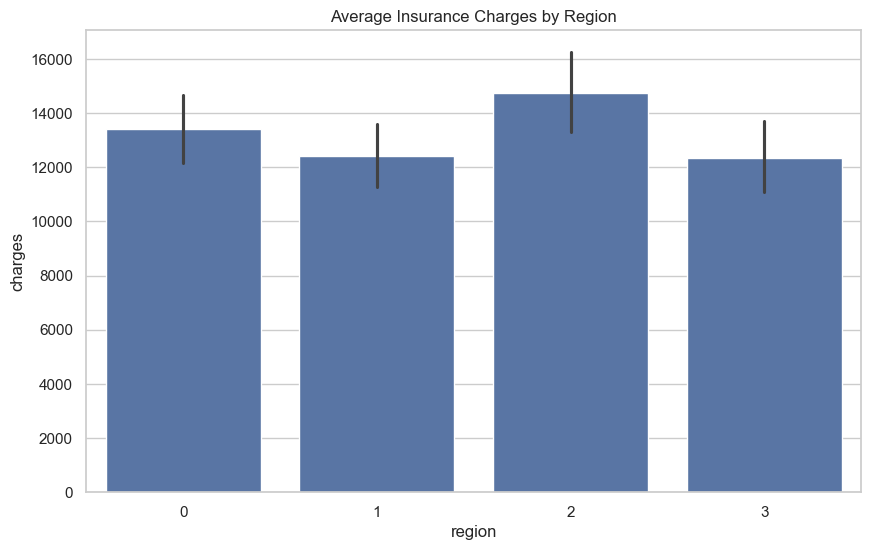

In [35]:
# Barplot for Average Charges by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=data)
plt.title('Average Insurance Charges by Region')
plt.show()

In [36]:
# Insights:- 
# Barplot for Average Charges by Region: Shows how insurance charges vary across different regions.

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.svm import SVR

In [40]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
svm_model = SVR()

In [41]:
# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train_scaled, y_train)

SVR()

In [42]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [43]:
# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)

In [44]:
# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

In [45]:
# Display results
print("Linear Regression - Mean Squared Error:", mse_lr)
print("Linear Regression - R^2 Score:", r2_lr)

print("Random Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R^2 Score:", r2_rf)

print("Decision Tree Regressor - Mean Squared Error:", mse_dt)
print("Decision Tree Regressor - R^2 Score:", r2_dt)

print("Support Vector Machine (SVM) - Mean Squared Error:", mse_svm)
print("Support Vector Machine (SVM) - R^2 Score:", r2_svm)

Linear Regression - Mean Squared Error: 33635210.43117845
Linear Regression - R^2 Score: 0.7833463107364536
Random Forest Regressor - Mean Squared Error: 21073365.415079337
Random Forest Regressor - R^2 Score: 0.8642606273649586
Decision Tree Regressor - Mean Squared Error: 49003243.60682007
Decision Tree Regressor - R^2 Score: 0.6843565603663775
Support Vector Machine (SVM) - Mean Squared Error: 165839509.92452022
Support Vector Machine (SVM) - R^2 Score: -0.06821813183902203


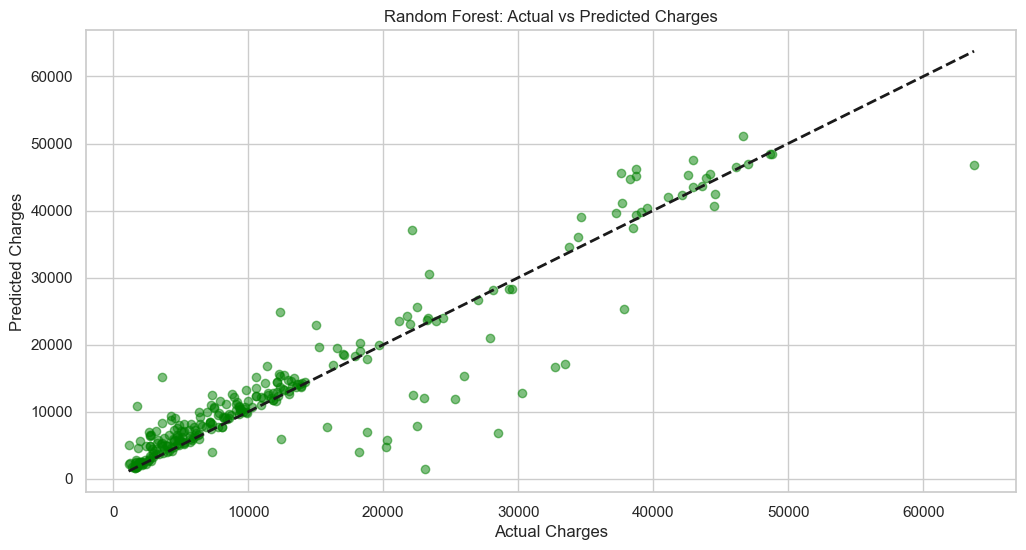

In [46]:
# Plotting actual vs predicted values for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest: Actual vs Predicted Charges')
plt.show()


In [47]:
# Create a dictionary with all features, initially setting them to 0 or appropriate default values
new_data_dict = {feature: [0] for feature in X.columns}


In [48]:
# Example: Setting feature values (adjust these as per your specific input scenario)
# For example, let's assume the following:
# age = 30, bmi = 25.0, children = 2, sex = 'male', smoker = 'yes', region = 'southeast'

new_data_dict['age'] = [30]
new_data_dict['bmi'] = [25.0]
new_data_dict['children'] = [2]

In [49]:
# Set categorical features
new_data_dict['sex_male'] = [1]  # If 'male' is the category, set it to 1
new_data_dict['smoker_yes'] = [1]  # If 'yes' is the category for smoking, set it to 1
new_data_dict['region_southeast'] = [1]  # Set the appropriate region

In [50]:
# Convert to DataFrame
new_data = pd.DataFrame(new_data_dict)

In [51]:
# Ensure all columns in new_data match those in X (the features used during model training)
new_data = new_data.reindex(columns=X.columns, fill_value=0)

In [52]:
# Predict the insurance charges using the trained model (e.g., Random Forest)
predicted_charge = rf_model.predict(new_data)
print(f"Predicted Insurance Charge: {predicted_charge[0]}")

Predicted Insurance Charge: 8556.699894500003


In [53]:
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [54]:
reg.score(X_test, y_test)

0.7833463107364539

In [55]:
forest= RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
forest.score(X_test, y_test)

0.8636799149030379

In [57]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
tree.score(X_test, y_test)

0.7175955022145353

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [60]:
# Define additional models
knn_model =  KNeighborsRegressor(n_neighbors=5)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [61]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [62]:
svr.score(X_test, y_test)

-0.07230823043884493

In [63]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [64]:
gbr.score(X_test, y_test)

0.8779726251291786

In [65]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
knn.score(X_test, y_test)

0.14450414235747

In [67]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [68]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)  # Scaled data is used here
y_pred_knn = knn.predict(X_test_scaled)

In [69]:
# just for example
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [70]:
# Example usage
# Assuming we use the Random Forest model
final_model = models['Random Forest']

In [71]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [74]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [75]:
# Best parameters and evaluation after tuning
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [76]:
# Best parameters and best score for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.8421764770683632


In [77]:
# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)

Random Forest - Mean Squared Error: 21073365.415079337
Random Forest - R^2 Score: 0.8642606273649586


In [78]:
# Feature Importance from the Best Model (Random Forest)
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

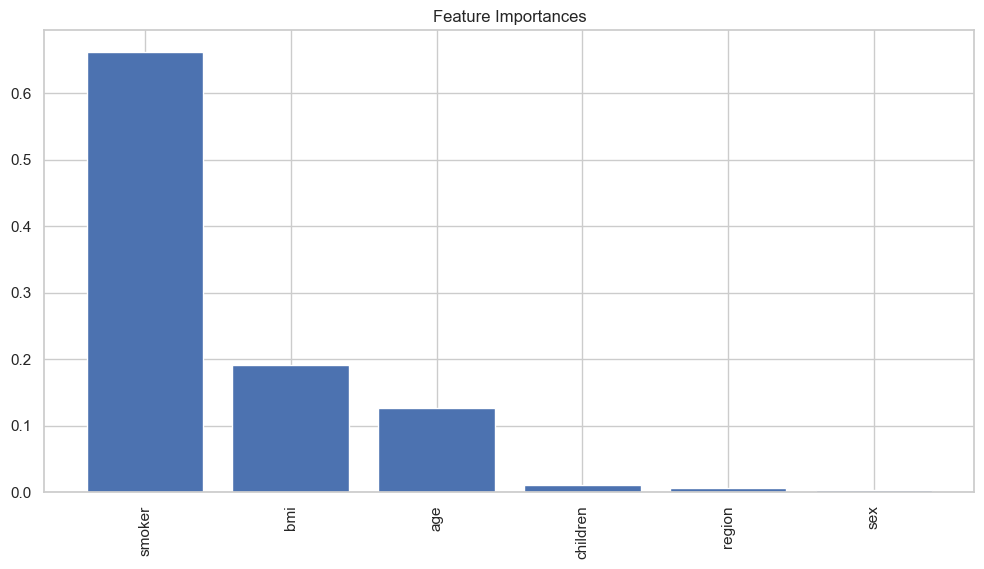

In [79]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [80]:
# Insights
print("Top 5 Features Influencing the Price:")
for i in range(5):
    print(f"{i+1}. {features[indices[i]]} - Importance: {importances[indices[i]]:.4f}")

Top 5 Features Influencing the Price:
1. smoker - Importance: 0.6616
2. bmi - Importance: 0.1909
3. age - Importance: 0.1271
4. children - Importance: 0.0111
5. region - Importance: 0.0067


In [81]:
models.update({
    'Linear Regression': LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'k-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
})


In [82]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Model Comparison Report
print("Model Comparison Report")
print(results_df)

Model Comparison Report
                      Model          MAE           MSE          RMSE        R2
0             Random Forest  2518.475635  2.089863e+07   4571.501475  0.865386
1         Linear Regression  4186.508898  3.363521e+07   5799.587091  0.783346
2             Decision Tree  3070.083148  4.734969e+07   6881.111205  0.695008
3  Support Vector Regressor  8599.328962  1.658395e+08  12877.868998 -0.068218
4       k-Nearest Neighbors  3045.706631  2.569035e+07   5068.565175  0.834521
5         Gradient Boosting  2446.925720  1.893213e+07   4351.106228  0.878053


In [83]:
# Challenges:-
# Here’s a concise overview of challenges in insurance cost prediction:

# Data Issues: Incomplete, inconsistent, or biased data can skew predictions.

# Feature Selection: Choosing relevant features and managing correlations can be tricky.

# Model Complexity: Balancing between overfitting and underfitting is challenging.

# Regulatory Compliance: Ensuring privacy and adhering to regulations can be complex.

# Predictive Accuracy: Accounting for dynamic factors and achieving high accuracy is difficult.

# External Factors: Economic conditions and natural disasters can impact predictions.

# Implementation: Integrating models into existing systems and ensuring scalability is challenging.

# User Interpretation: Making predictions understandable and building trust in the model is crucial.

In [84]:
# Business Case:-
# Here’s a brief business case for an insurance cost prediction project:

# Objective
# To develop a predictive model that accurately forecasts insurance costs to optimize pricing, improve risk assessment, and enhance customer satisfaction.

# Benefits
# Improved Accuracy: More precise cost predictions lead to better pricing strategies and reduced underwriting risks.
# Enhanced Profitability: Optimized pricing and risk management can increase profitability and market competitiveness.
# Customer Retention: Personalized and fair pricing improves customer satisfaction and retention.
# Operational Efficiency: Automated predictions streamline decision-making processes and reduce manual efforts.
# Regulatory Compliance: Accurate models help ensure adherence to regulatory requirements and reduce compliance risks.

# ROI
# Cost Savings: Reduced claims and better risk management lead to lower operational costs.
# Revenue Growth: Improved pricing strategies attract more customers and increase revenue.
# Competitive Edge: Advanced predictive capabilities differentiate the business from competitors.
# Challenges
# Data quality, model accuracy, regulatory compliance, and integration with existing systems.
# Implementation
# Develop, validate, and deploy the predictive model using historical data, integrating it into existing workflows, and continuously monitoring and refining the model.
# This approach positions the company to leverage data for strategic advantages, enhancing overall business performance.